<a href="https://colab.research.google.com/github/ShraddhaSharma24/Natural-Language-Processing/blob/main/Sentiment_Analysis_using_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
tarkkaanko_amazon_path = kagglehub.dataset_download('tarkkaanko/amazon')

print('Data source import complete.')


In [ ]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon/amazon_reviews.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
import string
import re

In [ ]:
df=pd.read_csv('/kaggle/input/amazon/amazon_reviews.csv')

In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
df['reviewText'][1]

'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.'

In [ ]:
df.shape

(4915, 12)

In [ ]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [ ]:
df1=df[['reviewText','overall']]
df1

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4911,Used this for extending the capabilities of my...,5.0
4912,Great card that is very fast and reliable. It ...,5.0
4913,Good amount of space for the stuff I want to d...,5.0


In [ ]:
df1['overall'].value_counts()

overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64

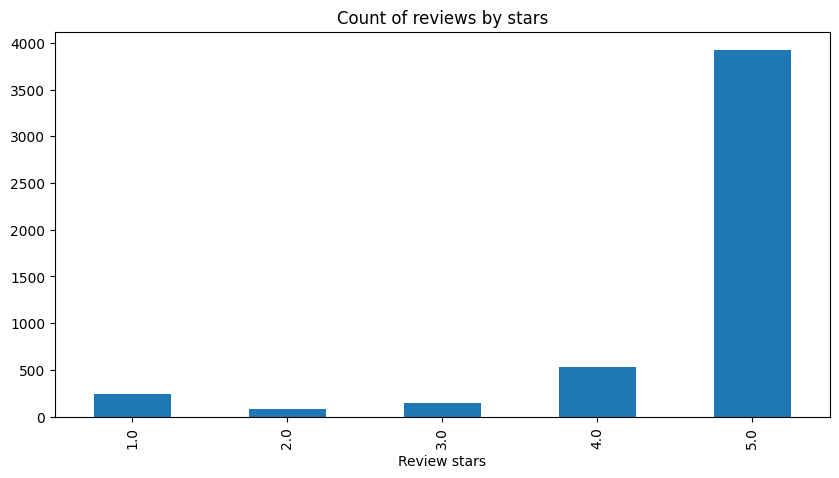

In [ ]:
ax= df1['overall'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars',figsize=(10,5))
ax.set_xlabel('Review stars')
plt.show()

In [ ]:
df1.isnull().sum()

reviewText    1
overall       0
dtype: int64

In [ ]:
most_frequent = df1['reviewText'].mode()[0]
df1['reviewText'] = df1['reviewText'].fillna(most_frequent)

/tmp/ipykernel_30/1168266689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviewText'] = df1['reviewText'].fillna(most_frequent)


In [ ]:
df1.shape

(4915, 2)

In [ ]:
df1.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [ ]:
df1[df1.duplicated()]

,reviewText,overall
3638,No issues.,5.0


In [ ]:
df2=df1.drop_duplicates()
df2.shape

(4914, 2)

In [ ]:
def map_review(x):
    if x<3:
        return 'Negative'
    elif x==3:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
df2['review']=df2['overall'].apply(lambda x: map_review(x))

/tmp/ipykernel_30/127538847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review']=df2['overall'].apply(lambda x: map_review(x))


In [ ]:
df2.head()

,reviewText,overall,review
0,No issues.,4.0,Positive
1,"Purchased this for my device, it worked as adv...",5.0,Positive
2,it works as expected. I should have sprung for...,4.0,Positive
3,This think has worked out great.Had a diff. br...,5.0,Positive
4,"Bought it with Retail Packaging, arrived legit...",5.0,Positive


In [ ]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [ ]:
total_stopwords = set(stop_words)

#negative stopwords
negative_stop_words=set(word for word in total_stopwords
                       if "n't" in word or 'no' in word)
final_stopwords = total_stopwords - negative_stop_words

#
final_stopwords.add("one")
print(final_stopwords)

{'further', 'been', 'hasn', 'being', "it's", 'who', "should've", 'aren', 'yours', 'both', 'will', 'by', 'doing', 'against', 'weren', 'down', 'too', 'needn', 'where', 'wouldn', 'off', 'the', 've', 's', 'himself', 'than', 'herself', 'we', 'when', 'during', 'but', 'mightn', 'his', 'them', 'shan', 'each', 'you', 'a', 'how', 'on', 'it', 'y', 'haven', 'o', 'be', 'him', "that'll", 'and', 'here', 'have', 'are', 'some', 'very', 'between', 'such', 'isn', 're', 'what', 'under', "you've", 'because', 'these', 'll', 'yourselves', 'if', 'ours', 'her', 'has', 'hers', 'in', 'why', 'most', 'their', 'couldn', 'there', 'before', 'me', 'same', 'only', "you're", 'does', 'which', 'then', 'to', 'he', 'our', 'as', 'from', 'were', 'one', 'after', 'above', 'or', 'just', 'she', 'those', 'd', 'an', 'wasn', 't', 'is', 'into', 'below', 'of', 'once', 'm', 'am', 'won', 'didn', 'for', 'was', 'mustn', 'own', 'ain', 'theirs', 'this', 'doesn', 'your', 'don', "you'll", 'that', 'few', 'at', 'do', 'having', 'more', 'did', 'i

In [ ]:
# stemming object
stemmer=PorterStemmer()
HTML_tags = re.compile('>,*?>')
table=str.maketrans(dict.fromkeys(string.punctuation))
remove_digita=str.maketrans('','',string.digits)
multiple_whitespace =re.compile(r"\s+")

In [ ]:
def Text_preprocessor(review):
    #remove html tags
    review=HTML_tags.sub(r'',review)

    #remove punctuation
    review=review.translate(table)

    #remove digits
    review=review.translate(remove_digita)

    # lowercase all letter
    review=review.lower()

    #remove multiplewhitespaces with single space
    remove=multiple_whitespace.sub("",review).strip()

    #remove stopword
    review=[word for word in review.split()
           if word not in final_stopwords]
    #stemming
    review=''.join([stemmer.stem(word) for word in review])

    return review

In [ ]:
text='Coffe is very weak, I have to use 3 packs to make 4 cuos of coffee'

In [ ]:
Text_preprocessor(text)

'coffweakusepackmakecuocoffe'

In [ ]:
def generate_wcclouds(text):
    stopwords=set(STOPWORDS)

    wordcloud=WordCloud(stopwords=stopwords,background_color='white')
    wordcloud.generate(text)


    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()


## Positive review wordcloud

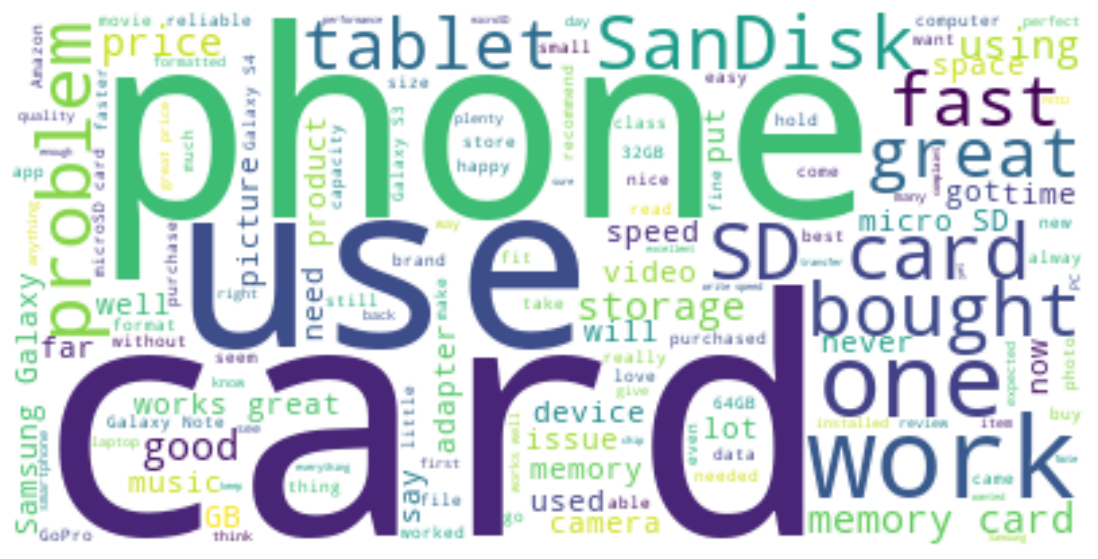

In [ ]:
pos=df2.loc[df2.review == 'Positive'].reviewText
text=" ".join(review for review in pos.astype(str))
generate_wcclouds(text)

## Negative review wordcloud

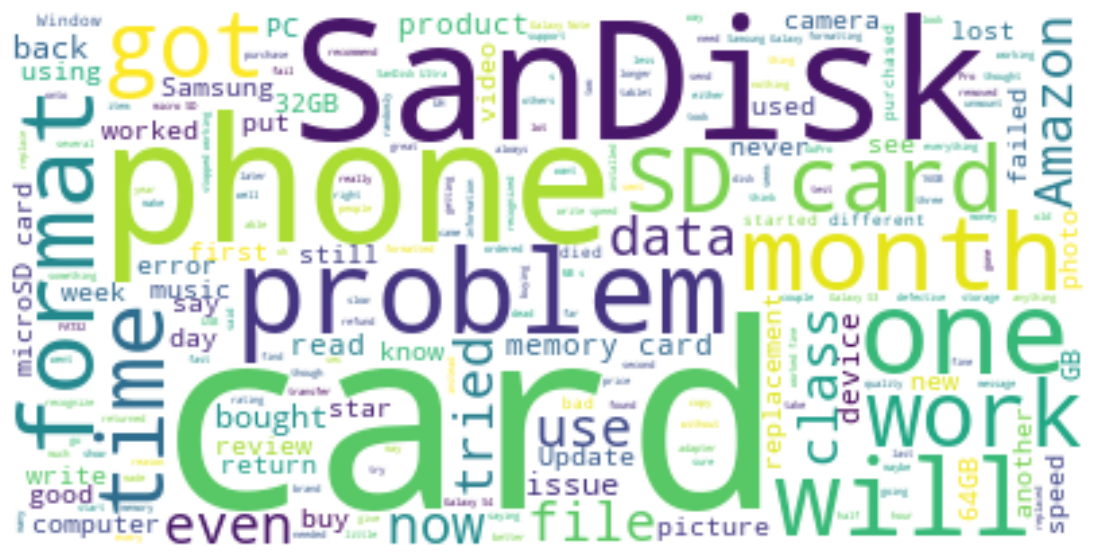

In [ ]:
pos=df2.loc[df2.review == 'Negative'].reviewText
text=" ".join(review for review in pos.astype(str))
generate_wcclouds(text)

## Neutral review wordcloud

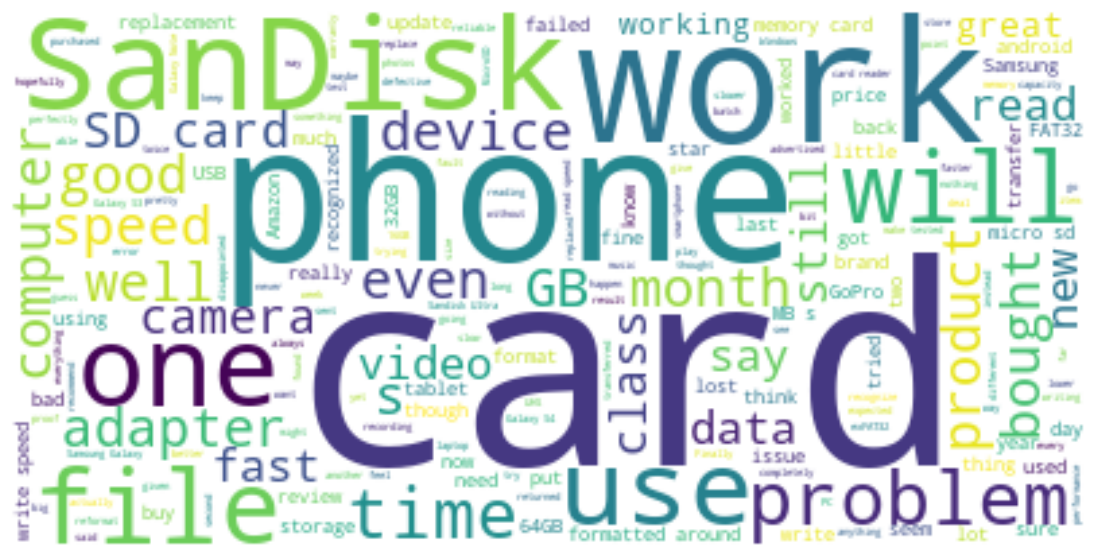

In [ ]:
pos=df2.loc[df2.review == 'Neutral'].reviewText
text=" ".join(review for review in pos.astype(str))
generate_wcclouds(text)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df2.reviewText
y=df2.review

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [ ]:
X_train.shape,X_test.shape

((3931,), (983,))

## Word Embedding: CountVectorizer

In [ ]:
bow_vectorizer=CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

#transform
bow_X_train=bow_vectorizer.transform(X_train)
bow_X_test=bow_vectorizer.transform(X_test)

## TfidfVectorizer

In [ ]:
tfidf_vectorizer=TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

#traansform
tfidf_X_train=tfidf_vectorizer.transform(X_train)
tfidf_X_test=tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder=LabelEncoder()

y_train=labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)

labels=labelencoder.classes_.tolist()
print(labels)

['Negative', 'Neutral', 'Positive']


In [ ]:
def train_and_eval(model,trainX,trainY,testX,testY):
    model.fit(trainX,trainY)

    #predictions
    y_preds_train=model.predict(trainX)
    y_preds_test=model.predict(testX)

    #evaluation
    print()
    print(model)
    print(f"Train accuracy score:{accuracy_score(y_train,y_preds_train)}")
    print(f"Test accuracy score:{accuracy_score(y_test,y_preds_test)}")


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Hyperparameters
C=[0.001,0.01,0.1,1,10]

for c in C:
    #define model
    log_model=LogisticRegression(C=c,max_iter=500,random_state=1)

    #Train and evaluate model
    train_and_eval(model=log_model,trainX=bow_X_train,trainY=y_train,testX=bow_X_test,testY=y_test)



LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score:0.9099465784787586
Test accuracy score:0.9033570701932858

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score:0.9328415161536505
Test accuracy score:0.9114954221770092

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score:0.9720172983973544
Test accuracy score:0.9186164801627671

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score:0.9984736708216738
Test accuracy score:0.9216683621566633

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score:1.0
Test accuracy score:0.9206510681586979


## Naive-Bayes Model-Hyperparameters

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model= MultinomialNB()

In [ ]:
alphas=[0,0.2,0.6,0.8,1]

for a in alphas:
    #Define model
    nb_model=MultinomialNB(alpha=a)

    #Train and evaluate model
    train_and_eval(model=nb_model,trainX=bow_X_train,trainY=y_train,testX=bow_X_test,testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score:0.9908420249300433
Test accuracy score:0.8992878942014242

MultinomialNB(alpha=0.2)
Train accuracy score:0.9727804629865174
Test accuracy score:0.91353001017294

MultinomialNB(alpha=0.6)
Train accuracy score:0.9570083948104808
Test accuracy score:0.9216683621566633

MultinomialNB(alpha=0.8)
Train accuracy score:0.95599084202493
Test accuracy score:0.9226856561546287

MultinomialNB(alpha=1)
Train accuracy score:0.9514118544899517
Test accuracy score:0.9206510681586979


/opt/conda/lib/python3.10/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


## Best model: Logistic Regression(c=1)with Tfidf data

In [ ]:
bmodel=LogisticRegression(C=1,max_iter=500,random_state=1)
bmodel.fit(tfidf_X_train,y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [ ]:
#predictions
y_preds_train=bmodel.predict(tfidf_X_train)
y_preds_test=bmodel.predict(tfidf_X_test)

In [ ]:
print(f"Train accuracy score:{accuracy_score(y_train,y_preds_train)}")
print(f"Test accuracy score:{accuracy_score(y_test,y_preds_test)}")

Train accuracy score:0.9394556092597304
Test accuracy score:0.9175991861648016


In [ ]:
def plot_cm(y_true,y_pred):
    plt.figure(figsize=(6,6))

    cm=confusion_matrix(y_true,y_pred,normalize='true')
    sns.heatmap(cm,annot=True,cmap='blues',char=False,fmt='.2f',xticklabels=labels,yticklabels=labels)
    return plt.show()

In [ ]:
plot_cm(y_test,y_preds_test)

NameError: name 'confusion_matrix' is not defined

<Figure size 600x600 with 0 Axes>

## Save model and Transformer

In [ ]:
import pickle

In [ ]:
with open("transformer.pkl","wb")as f:
    pickle.dump(tfidf_vectorizer,f)

with open("Sentiment prediction model.pkl","wb")as f:
    pickle.dump(bmodel,f)

## Prediction on single review

In [ ]:
def get_sentiment(review):
    #preprocessing
    x=Text_preprocessor(review)
    #vectorization
    x=tfidf_vectorizer.transform([x])
    #predcitions
    y=int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [ ]:
#positive review
review="This chips packet is very tasty.I highly recommend this!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


/tmp/ipykernel_30/2349759008.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(bmodel.predict(x.reshape(1,-1)))
